# CROP RECOMMENDATION SYSTEM 

## Importing Neccessary Libraries 

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')


## Importing Dataset

In [2]:
PATH = 'Crop_recommendation.csv'
df = pd.read_csv(PATH)

## Exploratory Data Analysis

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df['label']=LabelEncoder().fit_transform(df['label'])
df['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [10]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label            int32
dtype: object

In [11]:
df['label'].value_counts()

label
20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: count, dtype: int64

<Axes: >

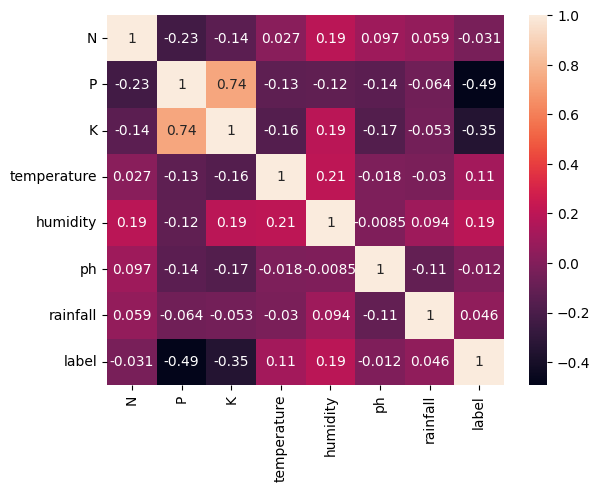

In [12]:
sns.heatmap(df.corr(),annot=True)

## Seperating features and target label and Preparing for training the models

In [13]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [14]:
acc_list = []
precision_list = []
recall_list = []
f1_list = []
model_list = []
cross_val_score_list = []

In [15]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)
scaler = StandardScaler()
scaler.fit(Xtrain)

Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [16]:
def plot_cv_scores(cv_scores, model_name, figsize=(8, 4)):
    plt.figure(figsize=figsize)
    plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='b', label='CV Scores')
    plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', label='Mean CV Score')
    plt.title(f'Cross-Validation Scores for {model_name}')
    plt.xlabel('Fold')
    plt.ylabel('Score')
    plt.xticks(range(1, len(cv_scores) + 1))
    plt.legend()
    plt.grid()
    plt.show()

In [17]:
def plot_classification_report(report, model_name):
    df_report = pd.DataFrame(report).transpose()
    plt.figure(figsize=(6, 10))
    sns.heatmap(df_report.iloc[:-1, :], annot=True, cmap='Blues', fmt='.2f', cbar_kws={"orientation": "vertical"})
    plt.title(f'Classification Report for {model_name}')
    plt.ylabel('Metrics')
    plt.xlabel('Classes')
    plt.xticks(rotation=45)
    plt.show()

## Model Training

### 1) DecisionTree

In [18]:
def DecisionTreeAlgo(model_name='DecisionTree'):
    DecisionTree = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
    DecisionTree.fit(Xtrain, Ytrain)
    predicted_values = DecisionTree.predict(Xtest)

    acc = metrics.accuracy_score(Ytest, predicted_values)
    precision = precision_score(Ytest, predicted_values, average='weighted')
    recall = recall_score(Ytest, predicted_values, average='weighted')
    f1 = f1_score(Ytest, predicted_values, average='weighted')
    cv_scores = cross_val_score(DecisionTree, Xtrain, Ytrain, cv=5)

    acc_list.append(acc * 100)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    model_list.append(model_name)
    cross_val_score_list.append(cv_scores.mean())

    print(f"{model_name}'s Accuracy is: ", acc * 100)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    print("Cross-Validation Scores: ", cv_scores)
    print("Mean Cross-Validation Score: ", cv_scores.mean())

    plot_cv_scores(cv_scores,model_name)
    report = classification_report(Ytest, predicted_values, output_dict=True)
    plot_classification_report(report, model_name)
    
    pkl_filename = model_name + '.pkl'
    with open(pkl_filename, 'wb') as Model_pkl:
        pickle.dump(DecisionTree, Model_pkl)


DecisionTree's Accuracy is:  90.0
Precision:  0.8572423451078975
Recall:  0.9
F1 Score:  0.8706620473436312
Cross-Validation Scores:  [0.85795455 0.86079545 0.92613636 0.93465909 0.88636364]
Mean Cross-Validation Score:  0.8931818181818182


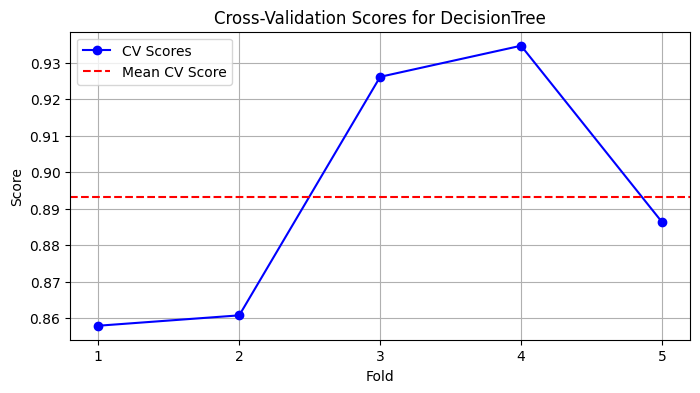

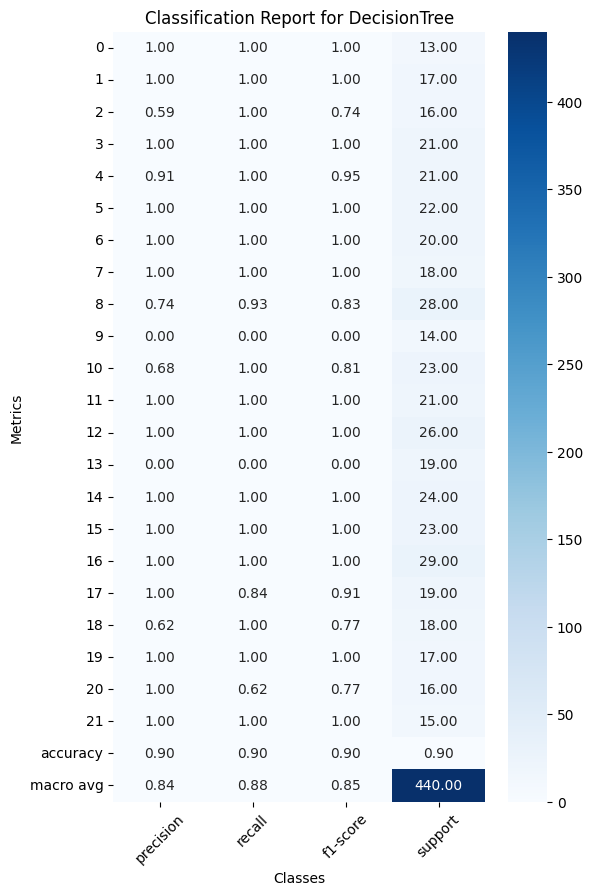

In [19]:
DecisionTreeAlgo()

### 2)  NaiveBayes

In [20]:
def NaiveBayesAlgo(model_name='NaiveBayes'):
    NaiveBayes = GaussianNB()
    NaiveBayes.fit(Xtrain,Ytrain)
    predicted_values = NaiveBayes.predict(Xtest)

    acc = metrics.accuracy_score(Ytest, predicted_values)
    precision = precision_score(Ytest, predicted_values, average='weighted')
    recall = recall_score(Ytest, predicted_values, average='weighted')
    f1 = f1_score(Ytest, predicted_values, average='weighted')
    cv_scores = cross_val_score(NaiveBayes, Xtrain, Ytrain, cv=5)

    acc_list.append(acc * 100)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    model_list.append(model_name)
    cross_val_score_list.append(cv_scores.mean())

    print(f"{model_name}'s Accuracy is: ", acc * 100)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    print("Cross-Validation Scores: ", cv_scores)
    print("Mean Cross-Validation Score: ", cv_scores.mean())

    plot_cv_scores(cv_scores,model_name)
    report = classification_report(Ytest, predicted_values, output_dict=True)
    plot_classification_report(report, model_name)
    
    pkl_filename = model_name + '.pkl'
    with open(pkl_filename, 'wb') as Model_pkl:
        pickle.dump(NaiveBayes, Model_pkl)


NaiveBayes's Accuracy is:  99.0909090909091
Precision:  0.9920454545454546
Recall:  0.990909090909091
F1 Score:  0.9905627705627705
Cross-Validation Scores:  [0.99715909 0.99715909 0.99715909 0.99431818 0.99431818]
Mean Cross-Validation Score:  0.9960227272727273


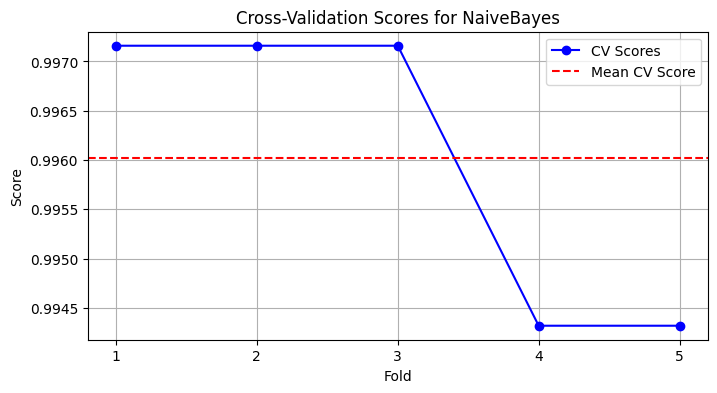

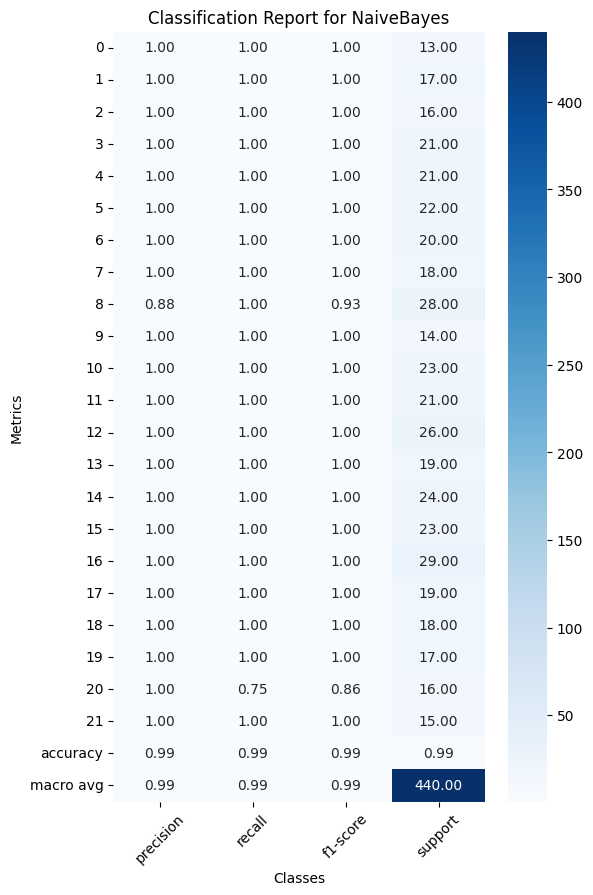

In [21]:
NaiveBayesAlgo()

### 3) SupportVectorMachine (SVM)

In [22]:
def SupportVectorMachineAlgo(model_name='SupportVectorMachine'):
    SupportVectorMachine = SVC(gamma='auto')
    SupportVectorMachine.fit(Xtrain,Ytrain)
    predicted_values = SupportVectorMachine.predict(Xtest)

    acc = metrics.accuracy_score(Ytest, predicted_values)
    precision = precision_score(Ytest, predicted_values, average='weighted')
    recall = recall_score(Ytest, predicted_values, average='weighted')
    f1 = f1_score(Ytest, predicted_values, average='weighted')
    cv_scores = cross_val_score(SupportVectorMachine, Xtrain, Ytrain, cv=5)

    acc_list.append(acc * 100)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    model_list.append(model_name)
    cross_val_score_list.append(cv_scores.mean())

    print(f"{model_name}'s Accuracy is: ", acc * 100)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    print("Cross-Validation Scores: ", cv_scores)
    print("Mean Cross-Validation Score: ", cv_scores.mean())

    plot_cv_scores(cv_scores,model_name)
    report = classification_report(Ytest, predicted_values, output_dict=True)
    plot_classification_report(report, model_name)
    
    pkl_filename = model_name + '.pkl'
    with open(pkl_filename, 'wb') as Model_pkl:
        pickle.dump(SupportVectorMachine, Model_pkl)

SupportVectorMachine's Accuracy is:  98.18181818181819
Precision:  0.9838525067970255
Recall:  0.9818181818181818
F1 Score:  0.9810195623103193
Cross-Validation Scores:  [0.98863636 0.98011364 0.98011364 0.96875    0.98863636]
Mean Cross-Validation Score:  0.98125


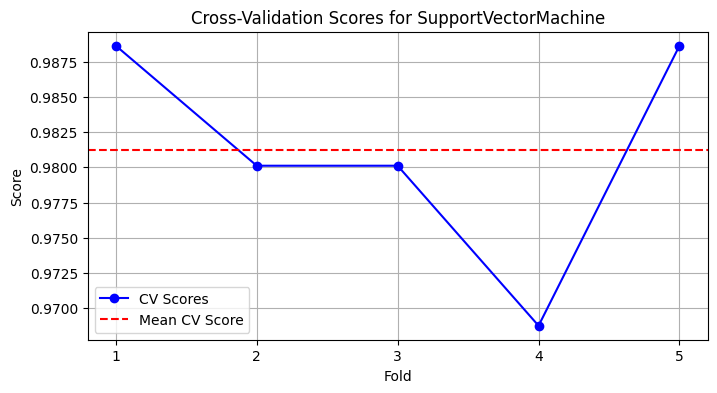

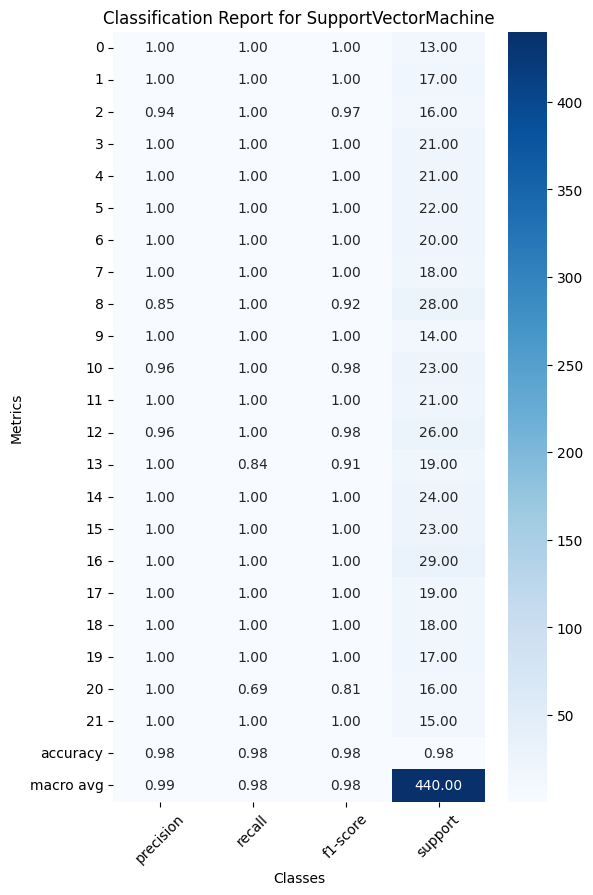

In [23]:
SupportVectorMachineAlgo()

### 4) LogisticRegression

In [24]:
def LogisticRegressionAlgo(model_name='LogisticRegression'):
    LogisticReg = LogisticRegression(random_state=2)
    LogisticReg.fit(Xtrain, Ytrain)
    predicted_values = LogisticReg.predict(Xtest)

    acc = metrics.accuracy_score(Ytest, predicted_values)
    precision = precision_score(Ytest, predicted_values, average='weighted')
    recall = recall_score(Ytest, predicted_values, average='weighted')
    f1 = f1_score(Ytest, predicted_values, average='weighted')
    cv_scores = cross_val_score(LogisticReg, Xtrain, Ytrain, cv=5)

    acc_list.append(acc * 100)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    model_list.append(model_name)
    cross_val_score_list.append(cv_scores.mean())

    print(f"{model_name}'s Accuracy is: ", acc * 100)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    print("Cross-Validation Scores: ", cv_scores)
    print("Mean Cross-Validation Score: ", cv_scores.mean())

    plot_cv_scores(cv_scores, model_name)
    report = classification_report(Ytest, predicted_values, output_dict=True)
    plot_classification_report(report, model_name)

    pkl_filename = model_name + '.pkl'
    with open(pkl_filename, 'wb') as Model_pkl:
        pickle.dump(LogisticReg, Model_pkl)

LogisticRegression's Accuracy is:  96.36363636363636
Precision:  0.9644089900541513
Recall:  0.9636363636363636
F1 Score:  0.9631002055388137
Cross-Validation Scores:  [0.98011364 0.95738636 0.97159091 0.97727273 0.97443182]
Mean Cross-Validation Score:  0.972159090909091


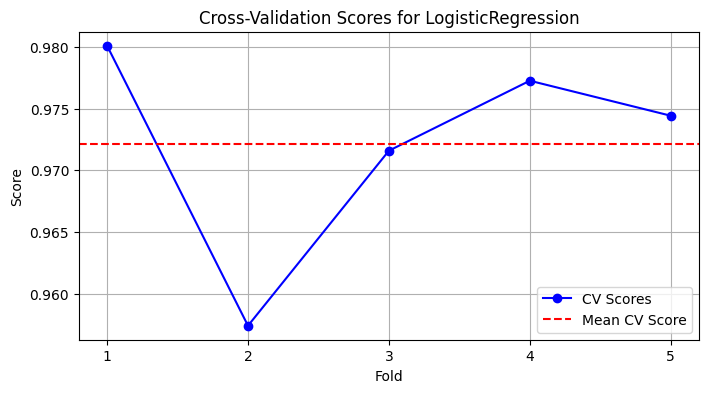

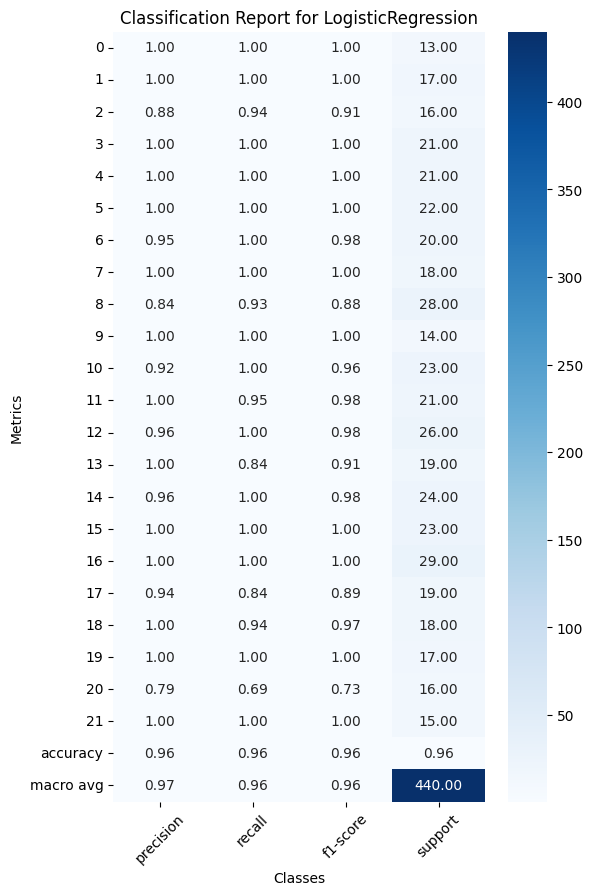

In [25]:
LogisticRegressionAlgo()

### 5) RandomForest

In [26]:
def RandomForestAlgo(model_name='RandomForest'):
    RandomForest = RandomForestClassifier(n_estimators=20, random_state=0)
    RandomForest.fit(Xtrain,Ytrain)
    predicted_values = RandomForest.predict(Xtest)

    acc = metrics.accuracy_score(Ytest, predicted_values)
    precision = precision_score(Ytest, predicted_values, average='weighted')
    recall = recall_score(Ytest, predicted_values, average='weighted')
    f1 = f1_score(Ytest, predicted_values, average='weighted')
    cv_scores = cross_val_score(RandomForest, Xtrain, Ytrain, cv=5)

    acc_list.append(acc * 100)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    model_list.append(model_name)
    cross_val_score_list.append(cv_scores.mean())

    print(f"{model_name}'s Accuracy is: ", acc * 100)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    print("Cross-Validation Scores: ", cv_scores)
    print("Mean Cross-Validation Score: ", cv_scores.mean())

    plot_cv_scores(cv_scores, model_name)
    report = classification_report(Ytest, predicted_values, output_dict=True)
    plot_classification_report(report, model_name)

    pkl_filename = model_name + '.pkl'
    with open(pkl_filename, 'wb') as Model_pkl:
        pickle.dump(RandomForest, Model_pkl)

RandomForest's Accuracy is:  99.0909090909091
Precision:  0.991702604795584
Recall:  0.990909090909091
F1 Score:  0.9907334926688309
Cross-Validation Scores:  [0.99715909 0.99431818 0.99715909 0.99147727 0.99715909]
Mean Cross-Validation Score:  0.9954545454545455


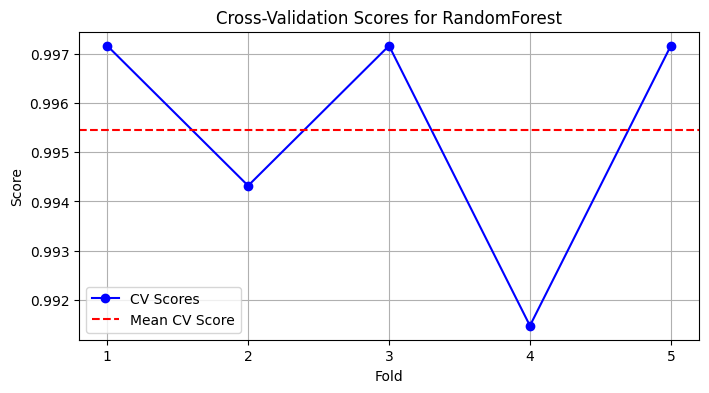

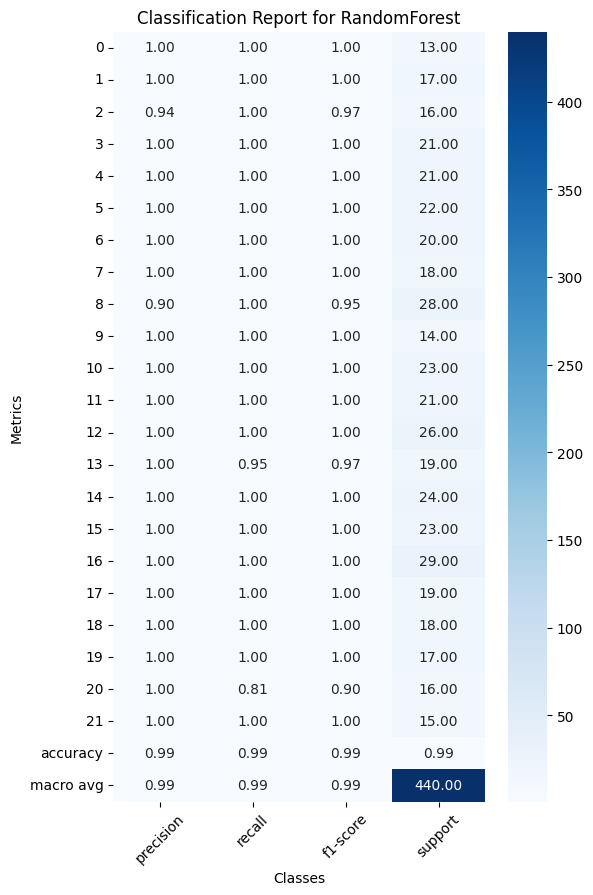

In [27]:
RandomForestAlgo()

### 6) XGBoost

In [28]:
def XGBoostAlgo(model_name='XGBoost'):
    XGBoost = xgb.XGBClassifier()
    XGBoost.fit(Xtrain,Ytrain)
    predicted_values = XGBoost.predict(Xtest)

    acc = metrics.accuracy_score(Ytest, predicted_values)
    precision = precision_score(Ytest, predicted_values, average='weighted')
    recall = recall_score(Ytest, predicted_values, average='weighted')
    f1 = f1_score(Ytest, predicted_values, average='weighted')
    cv_scores = cross_val_score(XGBoost, Xtrain, Ytrain, cv=5)

    acc_list.append(acc * 100)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    model_list.append(model_name)
    cross_val_score_list.append(cv_scores.mean())

    print(f"{model_name}'s Accuracy is: ", acc * 100)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    print("Cross-Validation Scores: ", cv_scores)
    print("Mean Cross-Validation Score: ", cv_scores.mean())

    plot_cv_scores(cv_scores, model_name)
    report = classification_report(Ytest, predicted_values, output_dict=True)
    plot_classification_report(report, model_name)

    pkl_filename = model_name + '.pkl'
    with open(pkl_filename, 'wb') as Model_pkl:
        pickle.dump(XGBoost, Model_pkl)

XGBoost's Accuracy is:  99.0909090909091
Precision:  0.9912593419199492
Recall:  0.990909090909091
F1 Score:  0.9908361023142658
Cross-Validation Scores:  [0.99147727 0.98579545 0.97727273 0.98579545 0.98863636]
Mean Cross-Validation Score:  0.9857954545454545


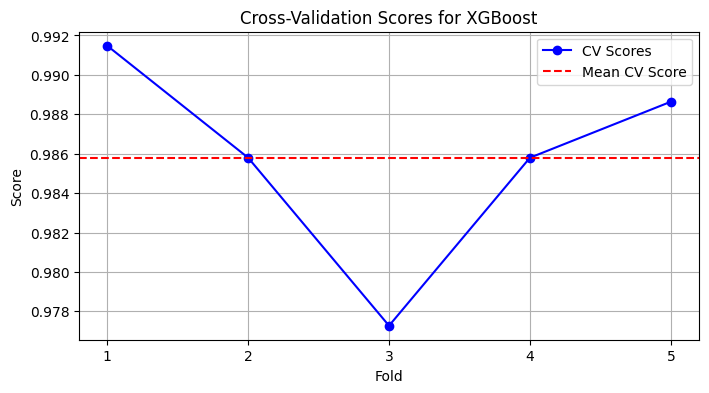

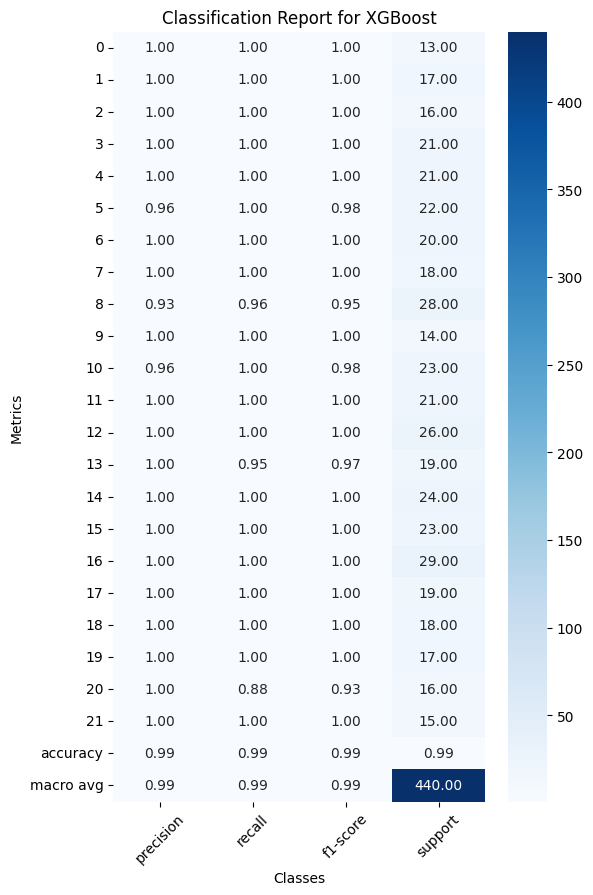

In [29]:
XGBoostAlgo()

### 7) KNN

In [30]:
def KthNearestNeighborAlgo(model_name='KthNearestNeighbor'):
    KthNearestNeighbor = KNeighborsClassifier(n_neighbors=5)
    KthNearestNeighbor.fit(Xtrain, Ytrain)
    predicted_values = KthNearestNeighbor.predict(Xtest)

    acc = metrics.accuracy_score(Ytest, predicted_values)
    precision = precision_score(Ytest, predicted_values, average='weighted')
    recall = recall_score(Ytest, predicted_values, average='weighted')
    f1 = f1_score(Ytest, predicted_values, average='weighted')
    cv_scores = cross_val_score(KthNearestNeighbor, Xtrain, Ytrain, cv=5)

    acc_list.append(acc * 100)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    model_list.append(model_name)
    cross_val_score_list.append(cv_scores.mean())

    print(f"{model_name}'s Accuracy is: ", acc * 100)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    print("Cross-Validation Scores: ", cv_scores)
    print("Mean Cross-Validation Score: ", cv_scores.mean())

    plot_cv_scores(cv_scores, model_name)
    report = classification_report(Ytest, predicted_values, output_dict=True)
    plot_classification_report(report, model_name)

    pkl_filename = model_name + '.pkl'
    with open(pkl_filename, 'wb') as Model_pkl:
        pickle.dump(KthNearestNeighbor, Model_pkl)

KthNearestNeighbor's Accuracy is:  97.04545454545455
Precision:  0.9722545894999264
Recall:  0.9704545454545455
F1 Score:  0.9698033886461063
Cross-Validation Scores:  [0.98295455 0.97159091 0.96875    0.96022727 0.97443182]
Mean Cross-Validation Score:  0.9715909090909092


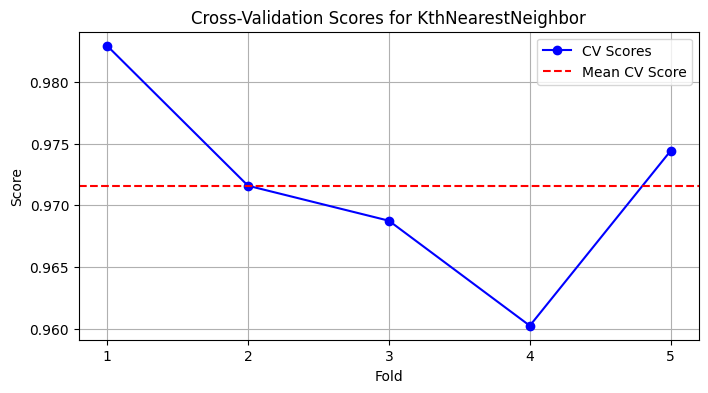

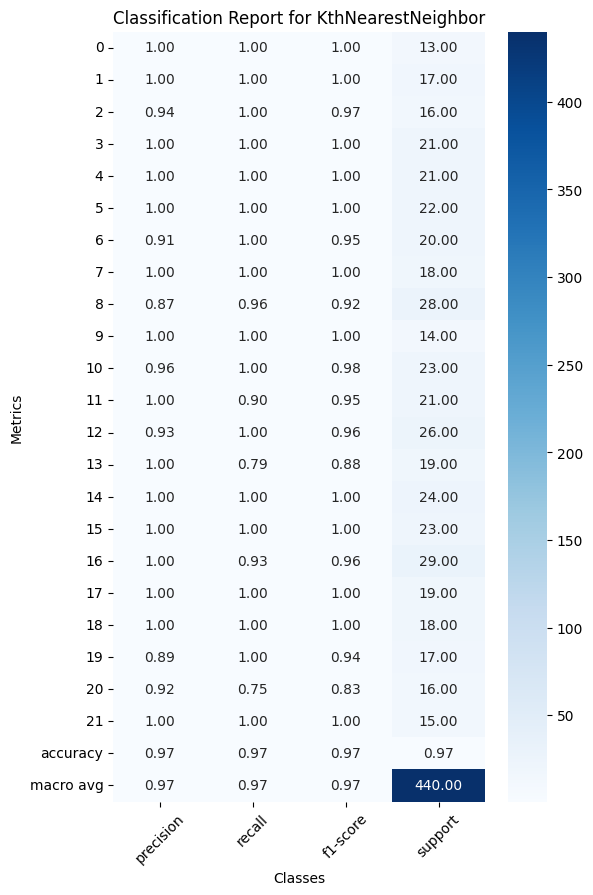

In [31]:
KthNearestNeighborAlgo()

### 8) GradientBoost

In [32]:
def GradientBoostingAlgo(model_name='GradientBoosting'):
    GradientBoosting = GradientBoostingClassifier()
    GradientBoosting.fit(Xtrain, Ytrain)
    predicted_values = GradientBoosting.predict(Xtest)

    acc = metrics.accuracy_score(Ytest, predicted_values)
    precision = precision_score(Ytest, predicted_values, average='weighted')
    recall = recall_score(Ytest, predicted_values, average='weighted')
    f1 = f1_score(Ytest, predicted_values, average='weighted')
    cv_scores = cross_val_score(GradientBoosting, Xtrain, Ytrain, cv=5)

    acc_list.append(acc * 100)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    model_list.append(model_name)
    cross_val_score_list.append(cv_scores.mean())

    print(f"{model_name}'s Accuracy is: ", acc * 100)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    print("Cross-Validation Scores: ", cv_scores)
    print("Mean Cross-Validation Score: ", cv_scores.mean())

    plot_cv_scores(cv_scores, model_name)
    report = classification_report(Ytest, predicted_values, output_dict=True)
    plot_classification_report(report, model_name)

    pkl_filename = model_name + '.pkl'
    with open(pkl_filename, 'wb') as Model_pkl:
        pickle.dump(GradientBoosting, Model_pkl)

GradientBoosting's Accuracy is:  99.31818181818181
Precision:  0.9938005050505051
Recall:  0.9931818181818182
F1 Score:  0.9932352179411001
Cross-Validation Scores:  [0.99431818 0.98295455 0.98863636 0.98863636 0.98579545]
Mean Cross-Validation Score:  0.9880681818181818


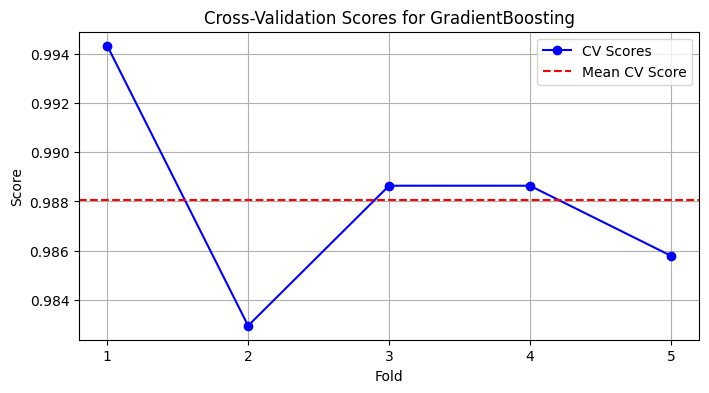

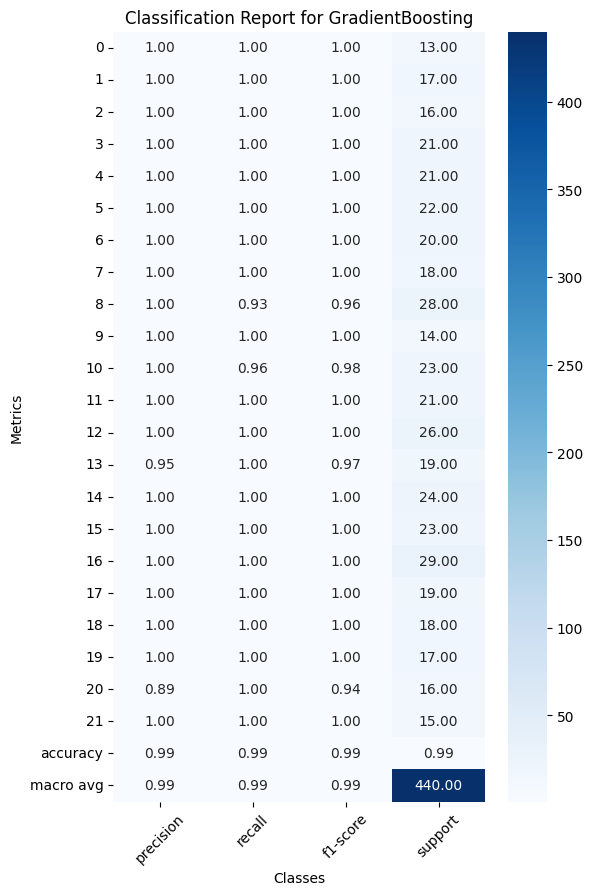

In [33]:
GradientBoostingAlgo()

### 9) ExtraTrees

In [34]:
def ExtraTreesAlgo(model_name='ExtraTrees'):
    ExtraTrees = ExtraTreesClassifier(n_estimators=100, random_state=0)
    ExtraTrees.fit(Xtrain, Ytrain)
    predicted_values = ExtraTrees.predict(Xtest)

    acc = metrics.accuracy_score(Ytest, predicted_values)
    precision = precision_score(Ytest, predicted_values, average='weighted')
    recall = recall_score(Ytest, predicted_values, average='weighted')
    f1 = f1_score(Ytest, predicted_values, average='weighted')
    cv_scores = cross_val_score(ExtraTrees, Xtrain, Ytrain, cv=5)

    acc_list.append(acc * 100)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    model_list.append(model_name)
    cross_val_score_list.append(cv_scores.mean())

    print(f"{model_name}'s Accuracy is: ", acc * 100)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    print("Cross-Validation Scores: ", cv_scores)
    print("Mean Cross-Validation Score: ", cv_scores.mean())

    plot_cv_scores(cv_scores, model_name)
    report = classification_report(Ytest, predicted_values, output_dict=True)
    plot_classification_report(report, model_name)

    pkl_filename = model_name + '.pkl'
    with open(pkl_filename, 'wb') as Model_pkl:
        pickle.dump(ExtraTrees, Model_pkl)

ExtraTrees's Accuracy is:  99.54545454545455
Precision:  0.9957575757575757
Recall:  0.9954545454545455
F1 Score:  0.9953814002089865
Cross-Validation Scores:  [0.99431818 0.99147727 0.99147727 0.99431818 0.99431818]
Mean Cross-Validation Score:  0.9931818181818182


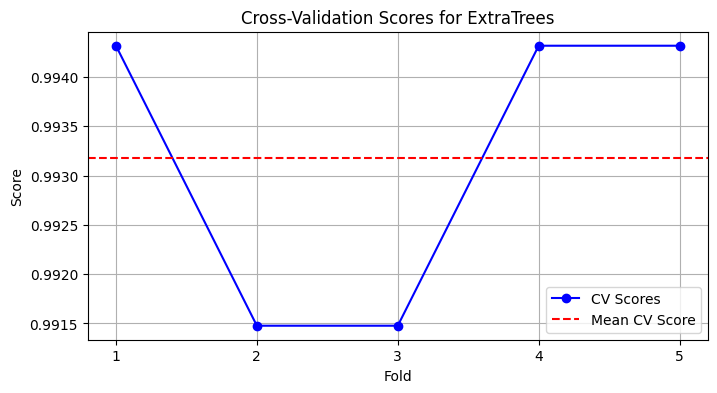

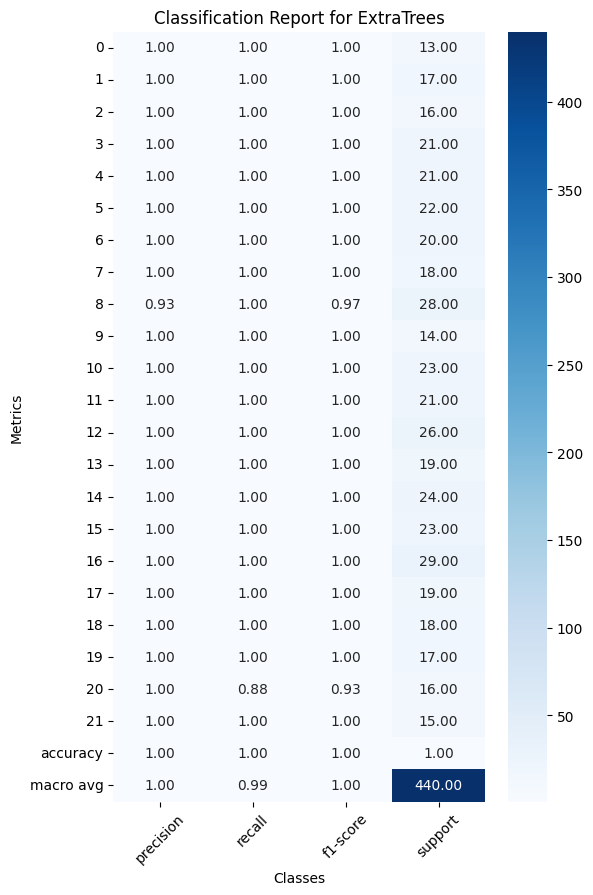

In [35]:
ExtraTreesAlgo()

### 10) CatBoost

In [36]:
def CatBoostAlgo(model_name='CatBoost'):
    CatBoost = CatBoostClassifier(iterations=50, learning_rate=0.1, depth=6, verbose=0)
    CatBoost.fit(Xtrain, Ytrain)
    predicted_values = CatBoost.predict(Xtest)

    acc = metrics.accuracy_score(Ytest, predicted_values)
    precision = precision_score(Ytest, predicted_values, average='weighted')
    recall = recall_score(Ytest, predicted_values, average='weighted')
    f1 = f1_score(Ytest, predicted_values, average='weighted')
    cv_scores = cross_val_score(CatBoost, Xtrain, Ytrain, cv=5)

    acc_list.append(acc * 100)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    model_list.append(model_name)
    cross_val_score_list.append(cv_scores.mean())

    print(f"{model_name}'s Accuracy is: ", acc * 100)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    print("Cross-Validation Scores: ", cv_scores)
    print("Mean Cross-Validation Score: ", cv_scores.mean())

    plot_cv_scores(cv_scores, model_name)
    report = classification_report(Ytest, predicted_values, output_dict=True)
    plot_classification_report(report, model_name)

    pkl_filename = model_name + '.pkl'
    with open(pkl_filename, 'wb') as Model_pkl:
        pickle.dump(CatBoost, Model_pkl)

CatBoost's Accuracy is:  98.63636363636363
Precision:  0.988219089288608
Recall:  0.9863636363636363
F1 Score:  0.9857808933442317
Cross-Validation Scores:  [0.99431818 0.99147727 0.99147727 0.98863636 0.99147727]
Mean Cross-Validation Score:  0.9914772727272728


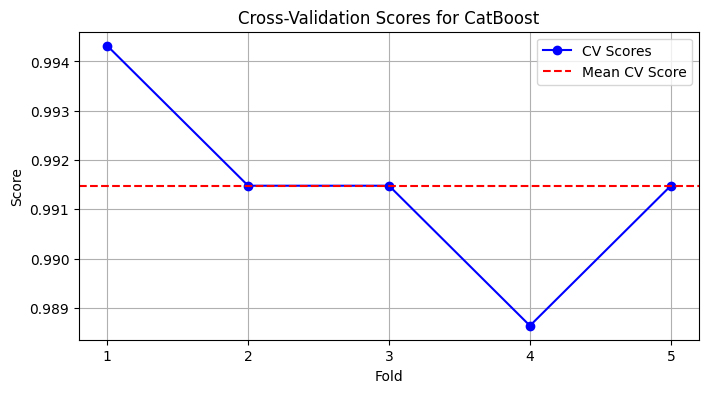

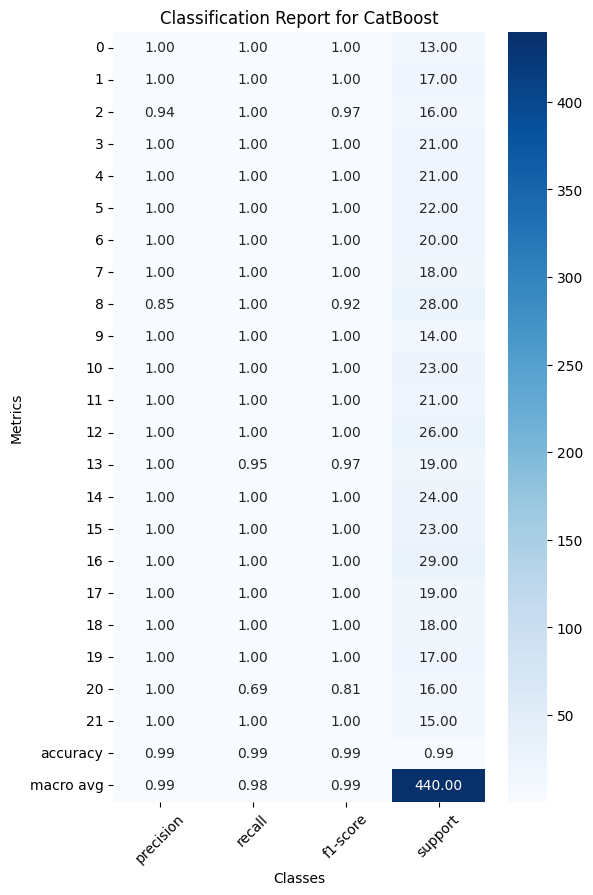

In [37]:
CatBoostAlgo()

### 11) AdaBoost

In [38]:
def AdaBoostAlgo(model_name='AdaBoost'):
    AdaBoost = AdaBoostClassifier(n_estimators=100, random_state=0)
    AdaBoost.fit(Xtrain, Ytrain)
    predicted_values = AdaBoost.predict(Xtest)

    acc = metrics.accuracy_score(Ytest, predicted_values)
    precision = precision_score(Ytest, predicted_values, average='weighted')
    recall = recall_score(Ytest, predicted_values, average='weighted')
    f1 = f1_score(Ytest, predicted_values, average='weighted')
    cv_scores = cross_val_score(AdaBoost, Xtrain, Ytrain, cv=5)

    acc_list.append(acc * 100)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    model_list.append(model_name)
    cross_val_score_list.append(cv_scores.mean())

    print(f"{model_name}'s Accuracy is: ", acc * 100)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    print("Cross-Validation Scores: ", cv_scores)
    print("Mean Cross-Validation Score: ", cv_scores.mean())

    plot_cv_scores(cv_scores, model_name)
    report = classification_report(Ytest, predicted_values, output_dict=True)
    plot_classification_report(report, model_name)

    pkl_filename = model_name + '.pkl'
    with open(pkl_filename, 'wb') as Model_pkl:
        pickle.dump(AdaBoost, Model_pkl)

AdaBoost's Accuracy is:  16.136363636363637
Precision:  0.11361045273771744
Recall:  0.16136363636363638
F1 Score:  0.11980936130312479
Cross-Validation Scores:  [0.13920455 0.23295455 0.14204545 0.14488636 0.19034091]
Mean Cross-Validation Score:  0.1698863636363636


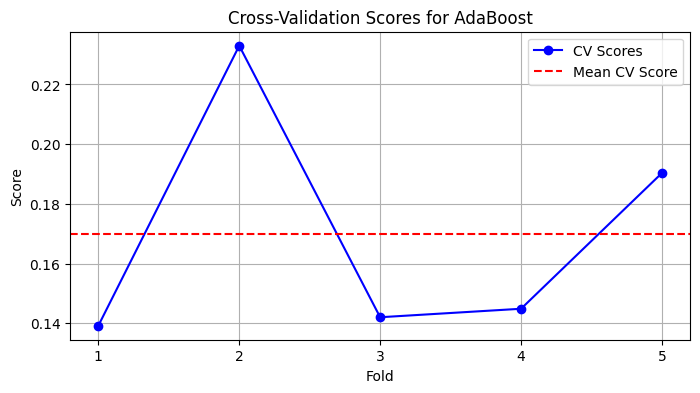

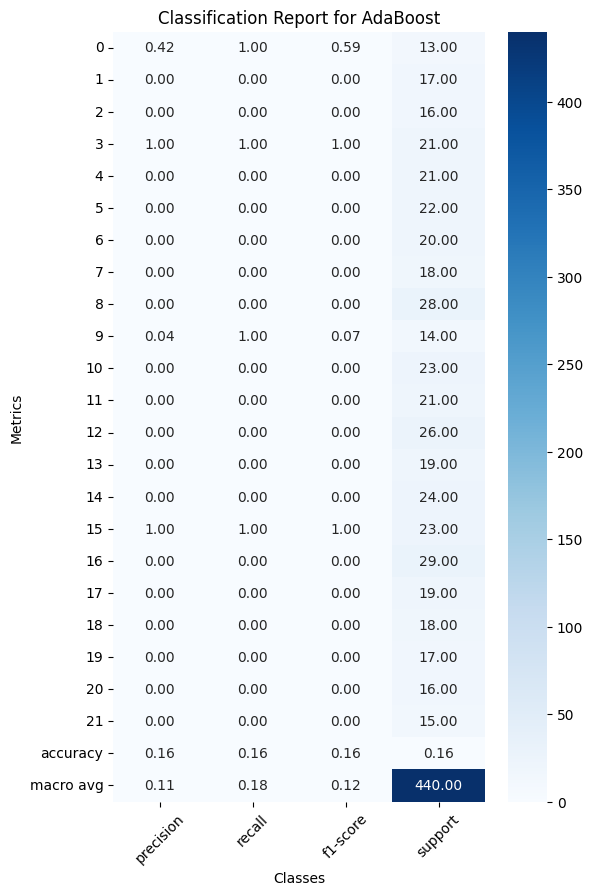

In [39]:
AdaBoostAlgo()

### 12) LightGBM

In [40]:
def LightGBMAlgo(model_name='LightGBM'):
    LightGBM = lgb.LGBMClassifier(n_estimators=5)
    LightGBM.fit(Xtrain, Ytrain)
    predicted_values = LightGBM.predict(Xtest)

    acc = metrics.accuracy_score(Ytest, predicted_values)
    precision = precision_score(Ytest, predicted_values, average='weighted')
    recall = recall_score(Ytest, predicted_values, average='weighted')
    f1 = f1_score(Ytest, predicted_values, average='weighted')
    cv_scores = cross_val_score(LightGBM, Xtrain, Ytrain, cv=5)

    acc_list.append(acc * 100)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    model_list.append(model_name)
    cross_val_score_list.append(cv_scores.mean())

    print(f"{model_name}'s Accuracy is: ", acc * 100)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    print("Cross-Validation Scores: ", cv_scores)
    print("Mean Cross-Validation Score: ", cv_scores.mean())

    plot_cv_scores(cv_scores, model_name)
    report = classification_report(Ytest, predicted_values, output_dict=True)
    plot_classification_report(report, model_name)

    pkl_filename = model_name + '.pkl'
    with open(pkl_filename, 'wb') as Model_pkl:
        pickle.dump(LightGBM, Model_pkl)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1333
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.007161
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.042252
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.116360
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.196403
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[

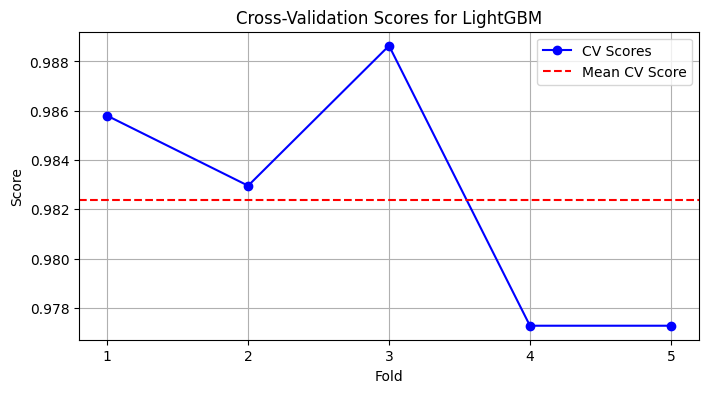

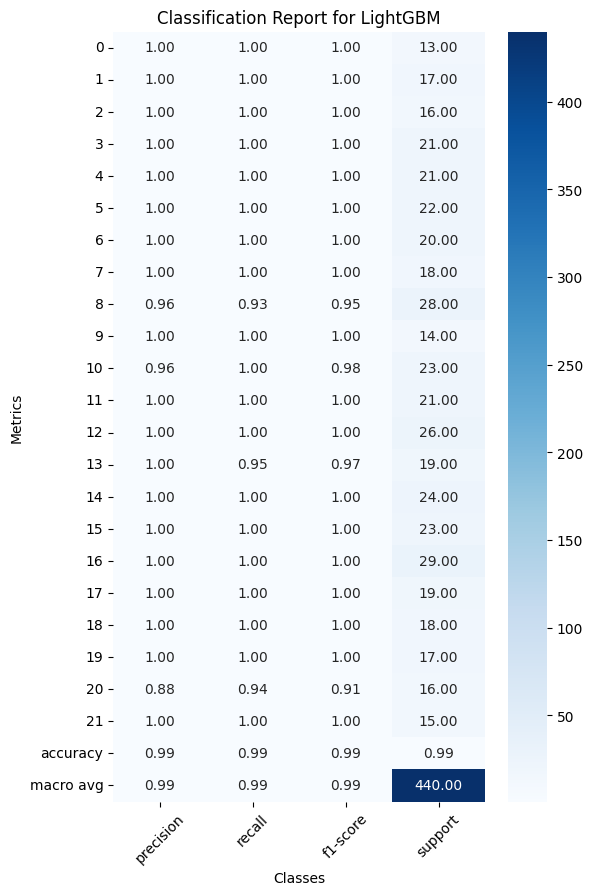

In [41]:
LightGBMAlgo()

### 13) MultiLayerPerceptron (MLP)

In [42]:
def MultiLayerPerceptronAlgo(model_name='MultiLayerPerceptron'):
    MultiLayerPerceptron = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=0)
    MultiLayerPerceptron.fit(Xtrain, Ytrain)
    predicted_values = MultiLayerPerceptron.predict(Xtest)

    acc = metrics.accuracy_score(Ytest, predicted_values)
    precision = precision_score(Ytest, predicted_values, average='weighted')
    recall = recall_score(Ytest, predicted_values, average='weighted')
    f1 = f1_score(Ytest, predicted_values, average='weighted')
    cv_scores = cross_val_score(MultiLayerPerceptron, Xtrain, Ytrain, cv=5)

    acc_list.append(acc * 100)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    model_list.append(model_name)
    cross_val_score_list.append(cv_scores.mean())

    print(f"{model_name}'s Accuracy is: ", acc * 100)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    print("Cross-Validation Scores: ", cv_scores)
    print("Mean Cross-Validation Score: ", cv_scores.mean())

    plot_cv_scores(cv_scores, model_name)
    report = classification_report(Ytest, predicted_values, output_dict=True)
    plot_classification_report(report, model_name)

    pkl_filename = model_name + '.pkl'
    with open(pkl_filename, 'wb') as Model_pkl:
        pickle.dump(MultiLayerPerceptron, Model_pkl)

MultiLayerPerceptron's Accuracy is:  97.95454545454545
Precision:  0.9800200888436184
Recall:  0.9795454545454545
F1 Score:  0.9796326015708521
Cross-Validation Scores:  [0.98863636 0.98011364 0.98863636 0.98295455 0.98863636]
Mean Cross-Validation Score:  0.9857954545454545


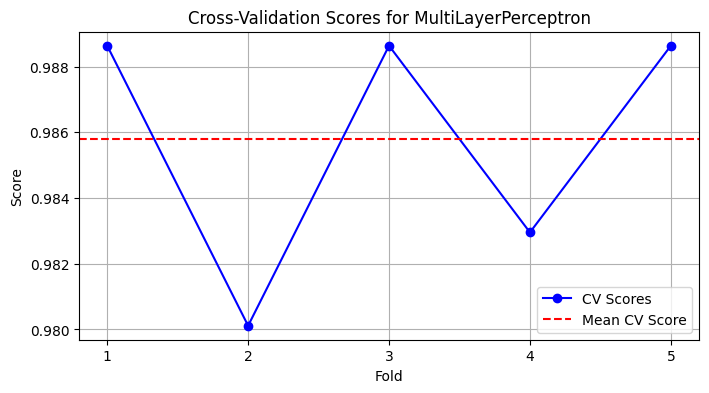

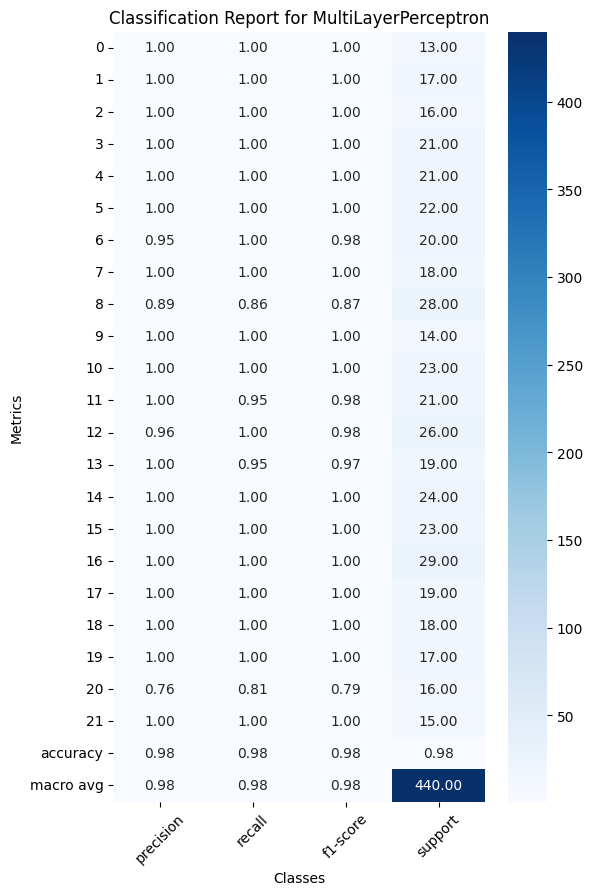

In [43]:
MultiLayerPerceptronAlgo()

## Comparisons

### Creating Result DataFrame

In [44]:
results_df = pd.DataFrame({
    'Model': model_list,
    'Accuracy': acc_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'Cross-Validation Score': cross_val_score_list
})


In [45]:
results_df.set_index('Model', inplace=True)

In [46]:
results_df

,Accuracy,Precision,Recall,F1 Score,Cross-Validation Score
Model,,,,,
DecisionTree,90.000000,0.857242,0.900000,0.870662,0.893182
NaiveBayes,99.090909,0.992045,0.990909,0.990563,0.996023
SupportVectorMachine,98.181818,0.983853,0.981818,0.981020,0.981250
LogisticRegression,96.363636,0.964409,0.963636,0.963100,0.972159
RandomForest,99.090909,0.991703,0.990909,0.990733,0.995455
XGBoost,99.090909,0.991259,0.990909,0.990836,0.985795
KthNearestNeighbor,97.045455,0.972255,0.970455,0.969803,0.971591
GradientBoosting,99.318182,0.993801,0.993182,0.993235,0.988068
ExtraTrees,99.545455,0.995758,0.995455,0.995381,0.993182


### Plot

In [47]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'cyan', 'magenta', 'pink', 'yellow', 'lime', 'teal', 'navy']

#### Accuracy

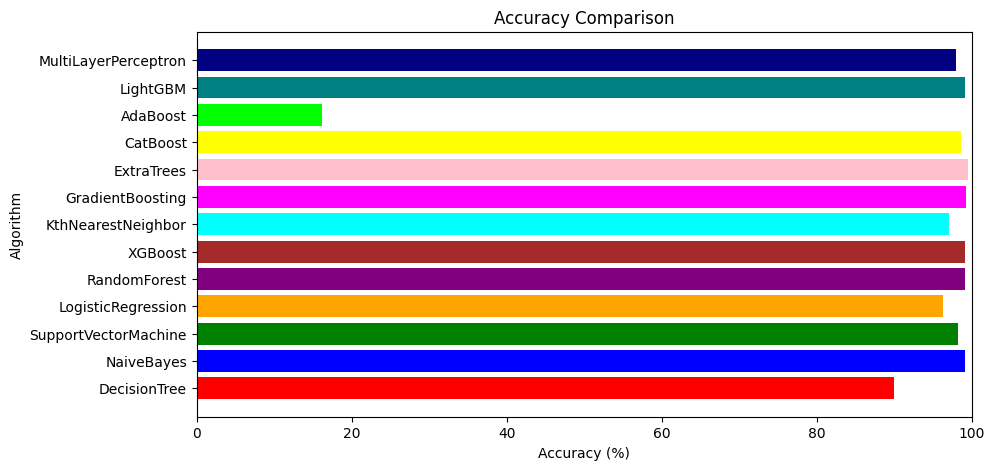

In [48]:
plt.figure(figsize=[10,5], dpi=100)
plt.barh(model_list, acc_list, color=colors)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy (%)')
plt.ylabel('Algorithm')
plt.xlim(0, 100)
plt.show()

In [49]:
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)
results_df_sorted

,Accuracy,Precision,Recall,F1 Score,Cross-Validation Score
Model,,,,,
ExtraTrees,99.545455,0.995758,0.995455,0.995381,0.993182
GradientBoosting,99.318182,0.993801,0.993182,0.993235,0.988068
NaiveBayes,99.090909,0.992045,0.990909,0.990563,0.996023
RandomForest,99.090909,0.991703,0.990909,0.990733,0.995455
XGBoost,99.090909,0.991259,0.990909,0.990836,0.985795
LightGBM,99.090909,0.991187,0.990909,0.990944,0.982386
CatBoost,98.636364,0.988219,0.986364,0.985781,0.991477
SupportVectorMachine,98.181818,0.983853,0.981818,0.981020,0.981250
MultiLayerPerceptron,97.954545,0.980020,0.979545,0.979633,0.985795


#### Precision

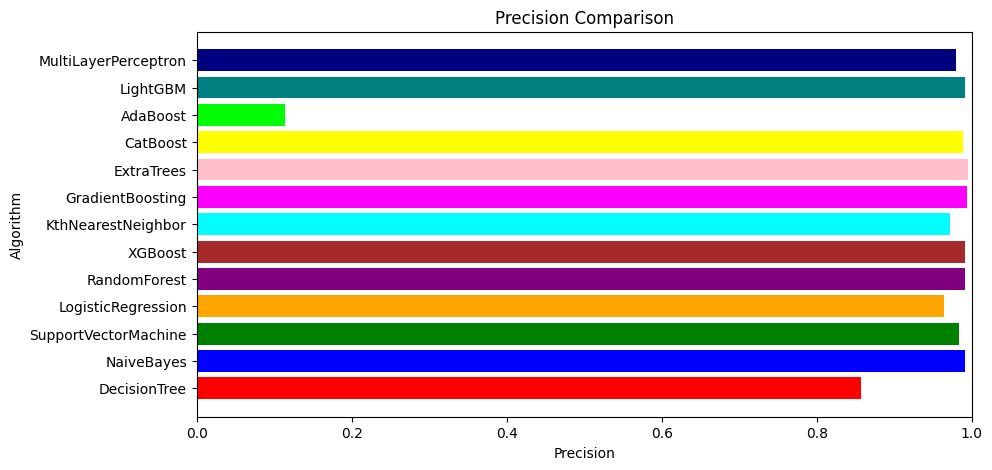

In [50]:
plt.figure(figsize=[10,5], dpi=100)
plt.barh(model_list, precision_list, color=colors)
plt.title('Precision Comparison')
plt.xlabel('Precision')
plt.ylabel('Algorithm')
plt.xlim(0, 1)
plt.show()

#### Recall

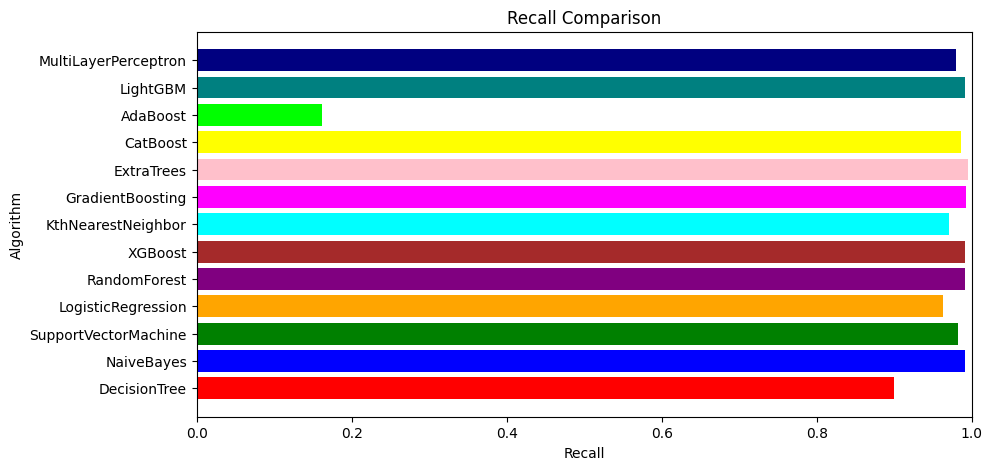

In [51]:
plt.figure(figsize=[10,5], dpi=100)
plt.barh(model_list, recall_list, color=colors)
plt.title('Recall Comparison')
plt.xlabel('Recall')
plt.ylabel('Algorithm')
plt.xlim(0, 1)
plt.show()

#### F1 Score

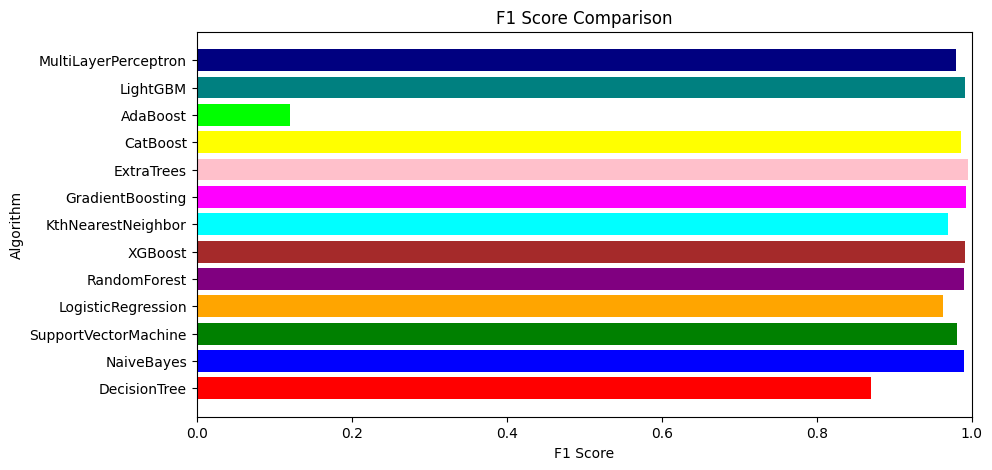

In [52]:
plt.figure(figsize=[10,5], dpi=100)
plt.barh(model_list, f1_list, color=colors)
plt.title('F1 Score Comparison')
plt.xlabel('F1 Score')
plt.ylabel('Algorithm')
plt.xlim(0, 1)
plt.show()

#### Cross-Validation Score

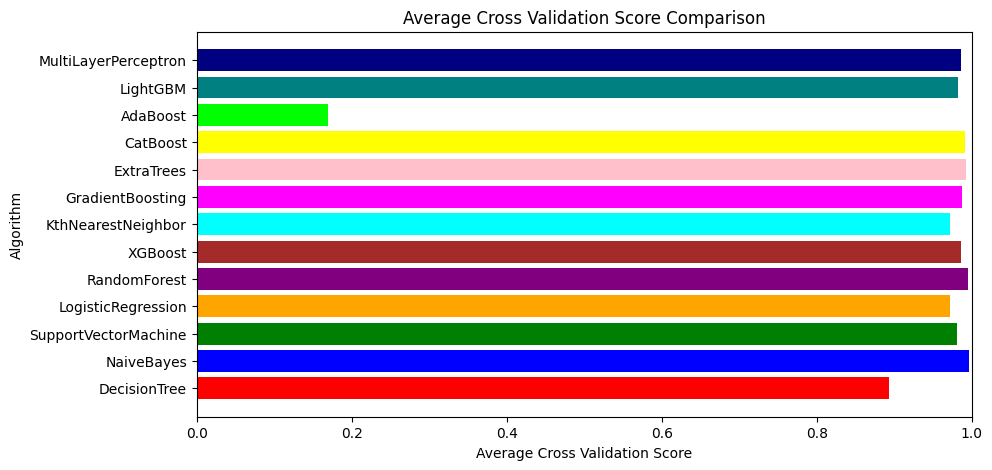

In [53]:
plt.figure(figsize=[10,5], dpi=100)
plt.barh(model_list, cross_val_score_list, color=colors)
plt.title('Average Cross Validation Score Comparison')
plt.xlabel('Average Cross Validation Score')
plt.ylabel('Algorithm')
plt.xlim(0, 1)
plt.show()